# Diamond Price Prediction

## Описание проекта:

Этот проект направлен на создание модели машинного обучения для предсказания цены за карат (price_per_carat) бриллиантов на основе их характеристик. Модель основана на данных с платформы James Allen и может быть использована для оценки стоимости бриллиантов в условиях меняющегося рынка.

Проект включает полный цикл работы с данными: от первичной обработки до построения и сравнения различных моделей регрессии. Мы исследуем несколько алгоритмов машинного обучения, чтобы определить наиболее точную модель для задачи.

**Описание характеристик**

* fluor - флюоресценция (свойство драгоценного камня светиться под * symmetry - показатель симметрии
* platform - название платформы, на которой был размещен драгоценный камень
* quality_group - составной показатель из симметрии огранки полировки
* size_group - группа по весу карата
* big_size_group - группа по весу карата
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только для круглых камней)
* polish - полировка
* id - номер драгоценного камня
* date - дата
* price - цена
* carat - количество каратов
* tablepercent - размер таблицы по сравнению с шириной
* price_per_carat - цена за карат
* z - длина (диаметр)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота

In [ ]:
import pandas as pd
import numpy as np

Загрузка данных

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
# Просмотр первых строк
df.head(10)

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
1,48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
2,236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
3,235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
4,277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228
5,143407,FNT,EX,jamesallen,RD,J,VVS1,EX,EX,13945129,202205,12120.0,1.50,8080.00,7.38,7.41,60.0,4.44600
6,189202,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.67570
7,76462,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.25180
8,10333,NONE,VG,jamesallen,RD,D,VS2,EX,VG,4666424,202207,19150.0,1.51,12682.12,7.31,7.27,62.4,4.53648
9,72397,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.51572


In [ ]:
# Информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63112 entries, 0 to 63111
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       63112 non-null  int64  
 1   fluor            63109 non-null  object 
 2   symmetry         63111 non-null  object 
 3   platform         63111 non-null  object 
 4   shape            63111 non-null  object 
 5   color            63111 non-null  object 
 6   clarity          63111 non-null  object 
 7   cut              42167 non-null  object 
 8   polish           63111 non-null  object 
 9   id               63112 non-null  int64  
 10  date             63112 non-null  int64  
 11  price            63112 non-null  float64
 12  carat            63112 non-null  float64
 13  price_per_carat  63111 non-null  float64
 14  z                63111 non-null  float64
 15  x                63111 non-null  float64
 16  depth_perc       63111 non-null  float64
 17  y           

In [ ]:
# Описательная статистика
df.describe()

,Unnamed: 0,id,date,price,carat,price_per_carat,z,x,depth_perc,y
count,63112.000000,6.311200e+04,63112.000000,6.311200e+04,63112.000000,63111.000000,63111.000000,63111.000000,63111.000000,63111.000000
mean,226993.568988,1.359641e+07,202202.845830,1.166629e+04,1.340748,7017.084059,7.082382,6.421699,64.095774,4.096650
std,130822.273132,2.532274e+06,804.893465,2.475501e+04,0.706749,4871.757876,1.376673,1.043099,4.218956,0.595411
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113039.750000,1.359099e+07,202205.000000,4.190000e+03,1.000000,4131.210000,6.260000,5.680000,61.700000,3.811500
50%,227113.000000,1.440062e+07,202206.000000,6.550000e+03,1.010000,5830.000000,6.530000,6.380000,63.000000,3.999000
75%,340044.250000,1.483816e+07,202207.000000,1.155000e+04,1.500000,8570.000000,7.660000,6.810000,66.000000,4.318800
max,453625.000000,1.541849e+07,202207.000000,2.286110e+06,20.280000,165340.000000,21.880000,17.570000,78.000000,10.717700


In [ ]:
# Количество пропущенных значений
df.isnull().sum()

,0
Unnamed: 0,0
fluor,3
symmetry,1
platform,1
shape,1
color,1
clarity,1
cut,20945
polish,1
id,0


### Очистка данных
Не все драгоценные камни удается продать в течение месяца, поэтому в таблице есть повторы. Объединяем данные по каждому самоцвету.

**Найдем аномалии:** возможно, цена на некоторые самоцветы резко меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедимся, что другие параметры драгоценного камня не меняются.

Объединение данных по каждому камню

In [ ]:
# Группировка по 'id' и агрегация данных
grouped = df.groupby('id').agg({
    'carat': 'first',  # Берем первое значение, так как оно не должно меняться
    'price_per_carat': 'mean',  # Используем среднее значение цены за карат
    'z': 'first',
    'x': 'first',
    'depth_perc': 'first',
    'y': 'first',
    'fluor': 'first',
    'symmetry': 'first',
    'platform': 'first',
    'shape': 'first',
    'color': 'first',
    'clarity': 'first',
    'cut': 'first',
    'polish': 'first'
}).reset_index()

# Проверка результата
print(grouped.head())

      id  carat  price_per_carat     z     x  depth_perc        y fluor  \
0      0   0.00             0.00  0.00  0.00         0.0  0.00000  None   
1  19423   1.05         13580.95  6.67  6.64        59.7  3.96408  NONE   
2  19501   2.00         17490.00  8.01  7.92        62.0  4.91040   FNT   
3  19504   2.01         11512.44  7.03  6.70        73.0  4.89100  NONE   
4  19507   2.03         13039.41  7.20  6.86        70.1  4.80886  NONE   

  symmetry    platform  shape color clarity   cut polish  
0     None        None   None  None    None  None   None  
1       EX  jamesallen     RD     D    VVS2    EX     EX  
2       VG  jamesallen     RD     D     VS1    VG      G  
3       VG  jamesallen  EM SQ     E     VS2  None     EX  
4       VG  jamesallen  EM SQ     E     VS1  None     VG  


Поиск аномалий

In [ ]:
# Расчет относительной разницы в ценах
price_variability = df.groupby('id')['price_per_carat'].agg(['min', 'max'])
price_variability['relative_diff'] = ((price_variability['max'] - price_variability['min']) / price_variability['min']) * 100

# Определение порога для аномалий
threshold = price_variability['relative_diff'].quantile(0.99)
anomalies = price_variability[price_variability['relative_diff'] > threshold]

# Вывод аномалий
print(f"Количество камней с аномально большим относительным разбросом цен: {anomalies.shape[0]}")
print(anomalies.sort_values(by='relative_diff', ascending=False).head())

Количество камней с аномально большим относительным разбросом цен: 577
              min      max  relative_diff
id                                       
14855601  3550.00  5900.00      66.197183
11147921  1493.33  2440.00      63.393222
14327542  5930.00  8480.00      43.001686
14086439  4366.67  5858.33      34.160127
14847268  2400.00  3180.00      32.500000


Проверка изменения других параметров

In [ ]:
parameter_variability = df.groupby('id').agg({
    'carat': 'nunique',
    'color': 'nunique',
    'clarity': 'nunique',
    'cut': 'nunique',
    'shape': 'nunique',
    'fluor': 'nunique',
    'symmetry': 'nunique',
    'polish': 'nunique'
})

# Найдем камни с изменяющимися параметрами
changing_parameters = parameter_variability[(parameter_variability > 1).any(axis=1)]
print("Камни с изменяющимися параметрами:")
print(changing_parameters)

Камни с изменяющимися параметрами:
          carat  color  clarity  cut  shape  fluor  symmetry  polish
id                                                                  
14119867      1      2        1    1      1      1         2       1


Подсчет статистики по количеству драгоценных камней

In [ ]:
id_stat = df.groupby('id')['carat'].count().to_frame(name='count')
print("Статистика по количеству записей для каждого камня:")
print(id_stat.sort_values(by='count', ascending=False).head())

Статистика по количеству записей для каждого камня:
          count
id             
14731799      4
13524505      3
13538752      3
13253457      3
13071919      3


Разделение выборки

In [ ]:
# Подсчет количества записей для каждого камня
id_counts = df['id'].value_counts().to_frame(name='count')

# Добавляем информацию о количестве записей в исходный DataFrame
df = df.merge(id_counts, left_on='id', right_index=True)

# Разделение выборки
df_one = df.query('count == 1')  # Камни, которые встречаются один раз
df_three = df.query('count >= 2 and count <= 3')  # Камни, которые встречаются 2 или 3 раза

# Удаляем временный столбец 'count'
df_one = df_one.drop(columns=['count'])
df_three = df_three.drop(columns=['count'])

# Проверка результата
print(f"Количество камней, которые встречаются один раз: {df_one.shape[0]}")
print(f"Количество камней, которые встречаются 2 или 3 раза: {df_three.shape[0]}")

Количество камней, которые встречаются один раз: 52481
Количество камней, которые встречаются 2 или 3 раза: 10627


In [ ]:
df_three.describe()

,Unnamed: 0,id,date,price,carat,price_per_carat,z,x,depth_perc,y
count,10627.00000,1.062700e+04,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000
mean,189171.56874,1.315069e+07,202206.055425,12059.876729,1.343491,7025.495147,7.082146,6.393533,64.169681,4.082077
std,117246.12306,2.886443e+06,0.809223,24736.619621,0.748932,5278.770510,1.429341,1.070458,4.331892,0.610422
min,5.00000,1.942300e+04,202205.000000,980.000000,0.810000,1195.120000,4.880000,3.940000,46.000000,2.472100
25%,86812.50000,1.314061e+07,202205.000000,4070.000000,1.000000,4046.610000,6.240000,5.630000,61.700000,3.782350
50%,183296.00000,1.419489e+07,202206.000000,6320.000000,1.010000,5722.220000,6.510000,6.370000,63.000000,3.993030
75%,287854.50000,1.465456e+07,202207.000000,11210.000000,1.500000,8456.595000,7.670000,6.780000,66.600000,4.269075
max,453515.00000,1.541030e+07,202207.000000,601980.000000,11.020000,118733.730000,20.780000,14.050000,78.000000,8.908380


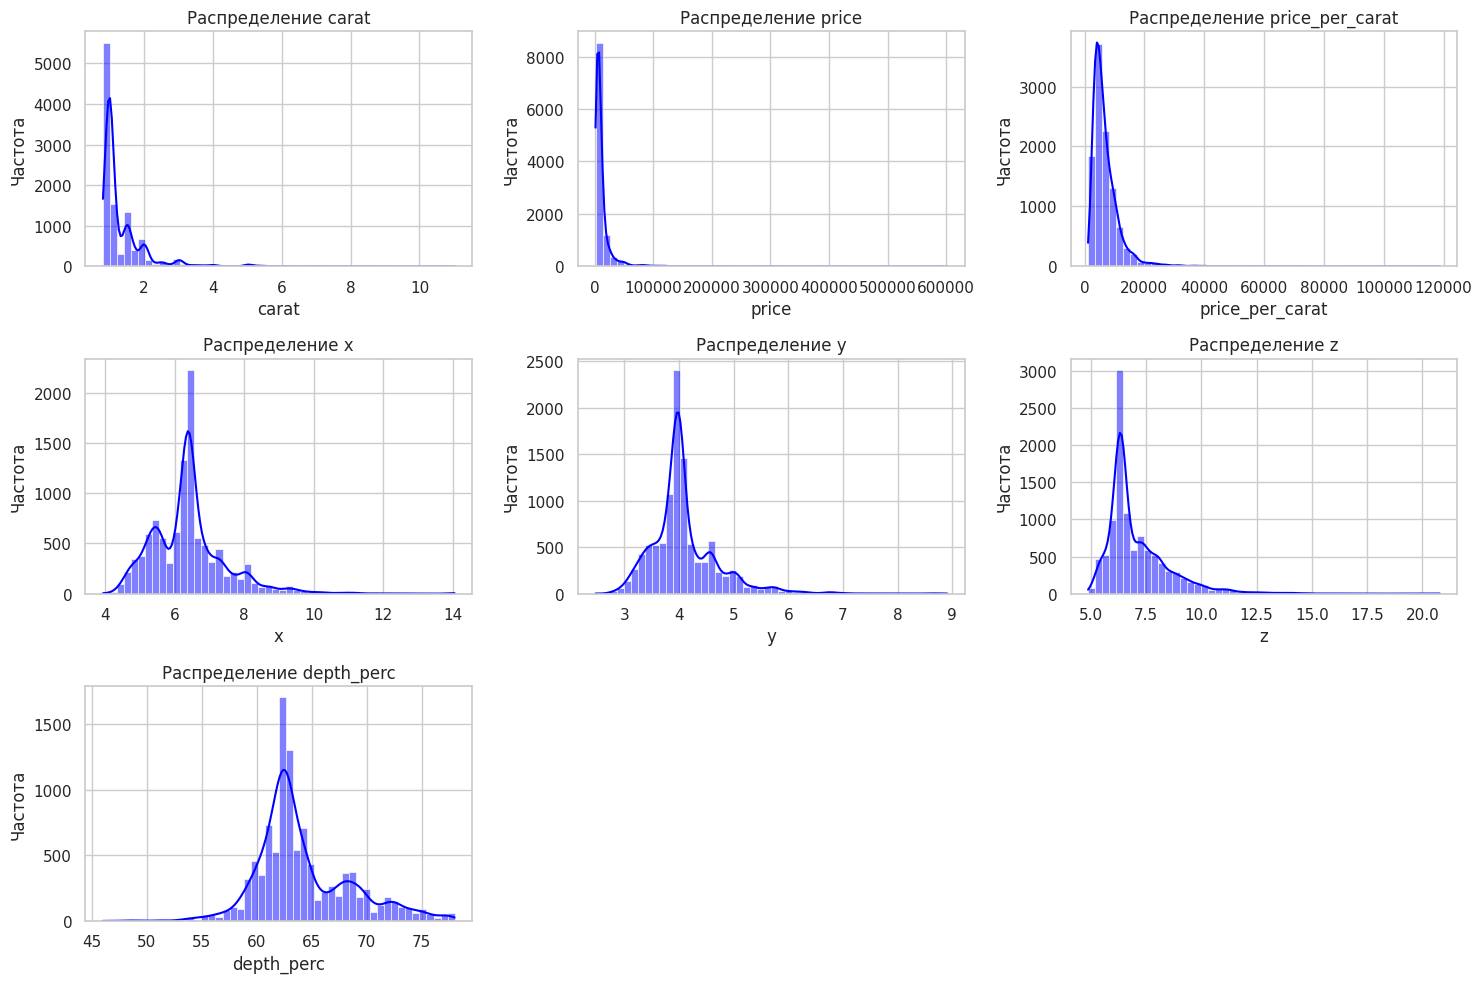

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set(style="whitegrid")

# Список столбцов для анализа
columns_to_plot = ['carat', 'price', 'price_per_carat', 'x', 'y', 'z', 'depth_perc']

# Построение графиков распределения
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_three[column], kde=True, bins=50, color='blue')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Удаление аномалий в выборке, где камни повторяются 2 или 3 раза

In [ ]:
# Удаление аномалий для carat
lower_carat = df_three['carat'].quantile(0.05)  # 5% наименьших значений
df_three = df_three[(df_three['carat'] >= lower_carat) & (df_three['carat'] <= 10)]

# Удаление аномалий для price
df_three = df_three[(df_three['price'] >= 100) & (df_three['price'] <= 30_000)]  # Исправлено: <= 30,000

# Удаление аномалий для price_per_carat
lower_ppc = df_three['price_per_carat'].quantile(0.05)  # 5% наименьших значений
df_three = df_three[(df_three['price_per_carat'] >= lower_ppc) & (df_three['price_per_carat'] <= 25_000)]

# Удаление аномалий для x, y, z и depth_perc
for column in ['x', 'y', 'z', 'depth_perc']:
    lower_bound = df_three[column].quantile(0.05)  # 5% наименьших значений
    upper_bound = df_three[column].quantile(0.95)  # 5% наибольших значений
    df_three = df_three[(df_three[column] >= lower_bound) & (df_three[column] <= upper_bound)]

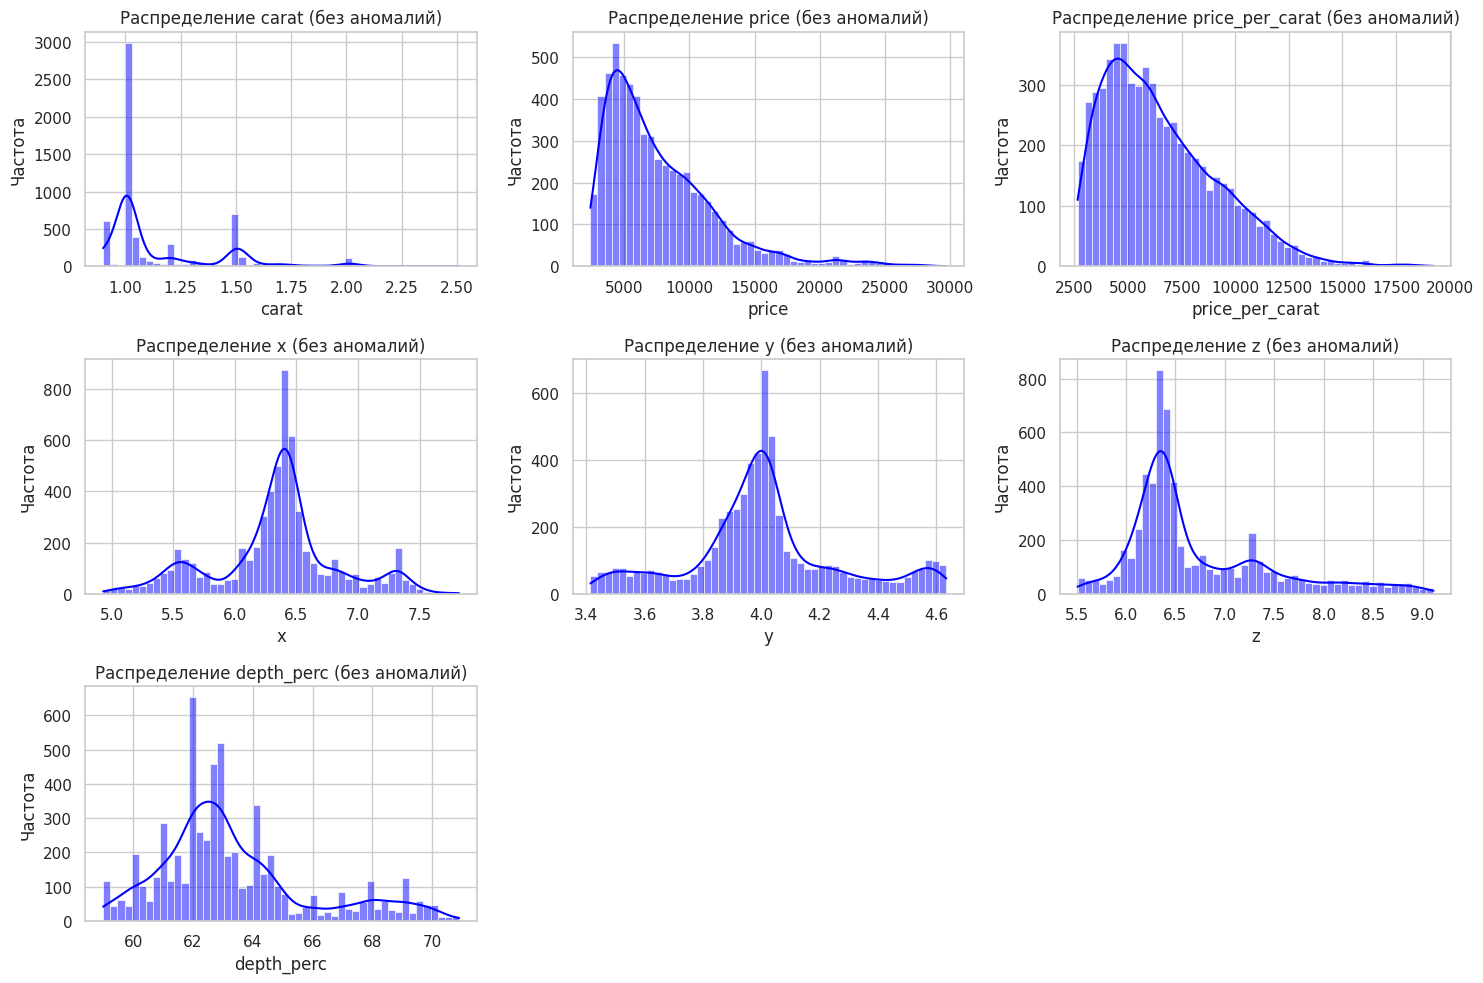

In [ ]:
# Построение графиков распределения после удаления аномалий
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_three[column], kde=True, bins=50, color='blue')
    plt.title(f'Распределение {column} (без аномалий)')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Последнее по времени значение цены

In [ ]:
# Сортировка данных по id и date (чтобы последние даты были в конце)
df_three = df_three.sort_values(by=['id', 'date'])

# Группировка по id и взятие последнего значения для price
last_prices = df_three.groupby('id')['price'].last().reset_index()

# Объединение с исходными данными
df_three = df_three.drop(columns=['price'])  # Удаляем старый столбец price
df_three = df_three.merge(last_prices, on='id', how='left')  # Добавляем новый столбец price

# Проверка результата
print(df_three.head())

   Unnamed: 0 fluor symmetry    platform shape color clarity cut polish  \
0           5  NONE       EX  jamesallen    RD     D    VVS2  EX     EX   
1           7  NONE       EX  jamesallen    RD     D    VVS2  EX     EX   
2         558  NONE       VG  jamesallen    RD     D    VVS2  VG     VG   
3         559  NONE       VG  jamesallen    RD     D    VVS2  VG     VG   
4         581  NONE       VG  jamesallen    RD     J     VS1  VG     VG   

      id    date  carat  price_per_carat     z     x  depth_perc        y  \
0  19423  202205   1.05         13304.76  6.67  6.64        59.0  3.91760   
1  19423  202207   1.05         13857.14  6.67  6.64        59.7  3.96408   
2  29201  202206   1.50         17326.67  7.42  7.33        61.4  4.50062   
3  29201  202207   1.50         17573.33  7.42  7.33        61.4  4.50062   
4  29322  202205   1.54          8318.18  7.42  7.36        62.0  4.56320   

     price  
0  14550.0  
1  14550.0  
2  26360.0  
3  26360.0  
4  12810.0  


Объединение

In [ ]:
# Объединение df_one и df_three
df = pd.concat([df_one, df_three]).reset_index(drop=True)

print(f"Общее количество строк после объединения: {df.shape[0]}")
print(df.head())

Общее количество строк после объединения: 58523
   Unnamed: 0 fluor symmetry    platform shape color clarity  cut polish  \
0      135269  NONE       EX  jamesallen    PS     F     SI1  NaN     EX   
1      235781  NONE       EX  jamesallen    RD     E     VS2   EX     EX   
2      143407   FNT       EX  jamesallen    RD     J    VVS1   EX     EX   
3      189202  NONE       EX  jamesallen    PS     D     SI2  NaN     EX   
4       76462  NONE       VG  jamesallen    EM     K     SI2  NaN     VG   

         id    date    price  carat  price_per_carat      z     x  depth_perc  \
0  13870838  202206  12850.0   1.55          8290.32  10.29  6.41        62.0   
1  14438434  202207   8660.0   1.00          8660.00   6.39  6.44        61.4   
2  13945129  202205  12120.0   1.50          8080.00   7.38  7.41        60.0   
3  14224443  202205   9120.0   1.51          6039.74  10.67  6.23        59.0   
4  12902293  202205   1390.0   0.91          1527.47   6.30  4.58        71.0   

        

Цены на бриллианты колеблются довольно значительно, попробуем рассчитать уровень инфляции и скорректировать цены на последний месяц. Следует отметить, что не все цены на бриллианты изменяются синхронно, то есть изменение в отдельных группах может быть разным.

Определим эти группы и рассчитаем коэффициенты инфляции для каждой из них. Скорректируем цены на эти коэффициенты и создадим переменную.

In [ ]:
# Определение групп для сегментации
categories = [
    'carat', 'color', 'clarity', 'cut', 'fluor', 'platform',
    'shape', 'polish'
]

In [ ]:
# Расчет среднего price_per_carat для каждой группы и каждого месяца
df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index()

In [ ]:
# Находим максимальную дату (последний месяц)
date_max = df_index.date.max()

# Сопоставление групп с максимальной датой
df_index = df_index.merge(
    df_index.query('date == @date_max')[categories + ['price_per_carat']]\
    .rename(columns={'price_per_carat': 'price_per_carat_max'}),
    on=categories, how='outer'
)

# Расчет уровня инфляции
df_index['inflation'] = df_index['price_per_carat_max'] / df_index['price_per_carat']

# Объединение всех данных с коэффициентами инфляции
df_with_inf = df.merge(
    df_index[['date'] + categories + ['inflation']],
    on=['date'] + categories, how='left'
)

# Корректировка цен на уровень инфляции
df_with_inf['price_per_carat_corrected'] = df_with_inf['price_per_carat'] * df_with_inf['inflation']
df_with_inf['price_corrected'] = df_with_inf['price'] * df_with_inf['inflation']

print(df_with_inf.head())

   Unnamed: 0 fluor symmetry    platform shape color clarity  cut polish  \
0      135269  NONE       EX  jamesallen    PS     F     SI1  NaN     EX   
1      235781  NONE       EX  jamesallen    RD     E     VS2   EX     EX   
2      143407   FNT       EX  jamesallen    RD     J    VVS1   EX     EX   
3      189202  NONE       EX  jamesallen    PS     D     SI2  NaN     EX   
4       76462  NONE       VG  jamesallen    EM     K     SI2  NaN     VG   

         id  ...    price  carat  price_per_carat      z     x  depth_perc  \
0  13870838  ...  12850.0   1.55          8290.32  10.29  6.41        62.0   
1  14438434  ...   8660.0   1.00          8660.00   6.39  6.44        61.4   
2  13945129  ...  12120.0   1.50          8080.00   7.38  7.41        60.0   
3  14224443  ...   9120.0   1.51          6039.74  10.67  6.23        59.0   
4  12902293  ...   1390.0   0.91          1527.47   6.30  4.58        71.0   

         y  inflation  price_per_carat_corrected  price_corrected  
0  3.9

Уровень инфляции по группам

In [ ]:
# Вывод уровня инфляции для каждой группы
inflation_by_group = df_index[['date'] + categories + ['inflation']]

# Группировка по категориям и вывод среднего уровня инфляции
average_inflation = inflation_by_group.groupby(categories)['inflation'].mean().reset_index()

# Сортировка по уровню инфляции (по убыванию)
average_inflation = average_inflation.sort_values(by='inflation', ascending=False)

# Вывод результата
print("Средний уровень инфляции по группам:")
print(average_inflation.head(10))

Средний уровень инфляции по группам:
       carat color clarity cut fluor    platform shape polish  inflation
4235    1.01     F     VS2  VG  NONE  jamesallen  CUSH     EX   2.112308
3181    1.00     H     VS1   G  NONE  jamesallen    RD     VG   1.724972
7553    1.16     E     SI2  EX   FNT  jamesallen    RD     EX   1.555556
5935    1.03     L     SI1  EX   FNT  jamesallen    RD     EX   1.388257
9821    1.50     G     SI2  VG  NONE  jamesallen    RD     VG   1.381204
3514    1.00     J     SI2   G  NONE  jamesallen    RD     EX   1.371622
8837    1.28     K      I1  EX   FNT  jamesallen    RD     EX   1.363334
9926    1.50     H     SI2  VG  NONE  jamesallen  CUSH     EX   1.356321
10227   1.50     K     SI2  EX  NONE  jamesallen    RD     EX   1.345938
10584   1.51     H     SI2  EX   FNT  jamesallen    RD     EX   1.315303


### Модель

Определяем фукцию потерь MSE, так как она штрафует большие ошибки сильнее, чем MAE, что полезно для задач, где важно минимизировать крупные отклонения.

In [ ]:
df_with_inf.head()

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,...,price,carat,price_per_carat,z,x,depth_perc,y,inflation,price_per_carat_corrected,price_corrected
0,135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,...,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420,NaN,NaN,NaN
1,235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,...,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416,1.00000,8660.0,8660.0
2,143407,FNT,EX,jamesallen,RD,J,VVS1,EX,EX,13945129,...,12120.0,1.50,8080.00,7.38,7.41,60.0,4.44600,0.97401,7870.0,11805.0
3,189202,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,...,9120.0,1.51,6039.74,10.67,6.23,59.0,3.67570,NaN,NaN,NaN
4,76462,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,...,1390.0,0.91,1527.47,6.30,4.58,71.0,3.25180,NaN,NaN,NaN


In [ ]:
df_with_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58523 entries, 0 to 58522
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 58523 non-null  int64  
 1   fluor                      58520 non-null  object 
 2   symmetry                   58522 non-null  object 
 3   platform                   58522 non-null  object 
 4   shape                      58522 non-null  object 
 5   color                      58522 non-null  object 
 6   clarity                    58522 non-null  object 
 7   cut                        40009 non-null  object 
 8   polish                     58522 non-null  object 
 9   id                         58523 non-null  int64  
 10  date                       58523 non-null  int64  
 11  price                      58523 non-null  float64
 12  carat                      58523 non-null  float64
 13  price_per_carat            58522 non-null  flo

In [ ]:
missing_values = df_with_inf.isnull().sum()
missing_values

,0
Unnamed: 0,0
fluor,3
symmetry,1
platform,1
shape,1
color,1
clarity,1
cut,18514
polish,1
id,0


Заполняем пропуски

In [ ]:
# Заполнение пропусков в 'cut'
df_with_inf['cut'] = df_with_inf['cut'].fillna('Unknown')

# Заполнение пропусков в 'inflation', 'price_per_carat_corrected', 'price_corrected'
# Используем среднее значение для каждой группы
for col in ['inflation', 'price_per_carat_corrected', 'price_corrected']:
    df_with_inf[col] = df_with_inf.groupby(categories)[col].transform(
        lambda x: x.fillna(x.mean())
    )

# Заполнение пропусков в 'fluor'
df_with_inf['fluor'] = df_with_inf['fluor'].fillna(df_with_inf['fluor'].mode()[0])

# Проверка пропусков после обработки
print("Пропущенные значения после обработки:")
print(df_with_inf.isnull().sum())

Пропущенные значения после обработки:
Unnamed: 0                       0
fluor                            0
symmetry                         1
platform                         1
shape                            1
color                            1
clarity                          1
cut                              0
polish                           1
id                               0
date                             0
price                            0
carat                            0
price_per_carat                  1
z                                1
x                                1
depth_perc                       1
y                                1
inflation                    29559
price_per_carat_corrected    29559
price_corrected              29559
dtype: int64


In [ ]:
# Заполнение пропусков в 'inflation', 'price_per_carat_corrected', 'price_corrected'
for col in ['inflation', 'price_per_carat_corrected', 'price_corrected']:
    # Заполняем пропуски средним значением для каждой группы
    df_with_inf[col] = df_with_inf.groupby(categories)[col].transform(
        lambda x: x.fillna(x.mean())
    )

    # Если остались пропуски, заполняем их глобальным средним значением
    global_mean = df_with_inf[col].mean()
    df_with_inf[col] = df_with_inf[col].fillna(global_mean)

# Проверка пропусков после обработки
print("Пропущенные значения после обработки:")
print(df_with_inf.isnull().sum())

Пропущенные значения после обработки:
Unnamed: 0                   0
fluor                        0
symmetry                     1
platform                     1
shape                        1
color                        1
clarity                      1
cut                          0
polish                       1
id                           0
date                         0
price                        0
carat                        0
price_per_carat              1
z                            1
x                            1
depth_perc                   1
y                            1
inflation                    0
price_per_carat_corrected    0
price_corrected              0
dtype: int64


Удаляем ненужные столбцы

In [ ]:
# Удаляем ненужные столбцы
columns_to_drop = [
    'Unnamed: 0',  # Технический столбец
    'id',          # Уникальный идентификатор
    'price',       # Исходная цена (используем price_corrected)
    'price_per_carat',  # Исходная цена за карат (используем price_per_carat_corrected)
    'inflation'    # Уровень инфляции (уже использован для коррекции цен)
]

df_with_inf = df_with_inf.drop(columns=columns_to_drop)

In [ ]:
df_with_inf.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,date,carat,z,x,depth_perc,y,price_per_carat_corrected,price_corrected
0,NONE,EX,jamesallen,PS,F,SI1,Unknown,EX,202206,1.55,10.29,6.41,62.0,3.97420,7445.028096,10374.556659
1,NONE,EX,jamesallen,RD,E,VS2,EX,EX,202207,1.00,6.39,6.44,61.4,3.95416,8660.000000,8660.000000
2,FNT,EX,jamesallen,RD,J,VVS1,EX,EX,202205,1.50,7.38,7.41,60.0,4.44600,7870.000000,11805.000000
3,NONE,EX,jamesallen,PS,D,SI2,Unknown,EX,202205,1.51,10.67,6.23,59.0,3.67570,7445.028096,10374.556659
4,NONE,VG,jamesallen,EM,K,SI2,Unknown,VG,202205,0.91,6.30,4.58,71.0,3.25180,7445.028096,10374.556659


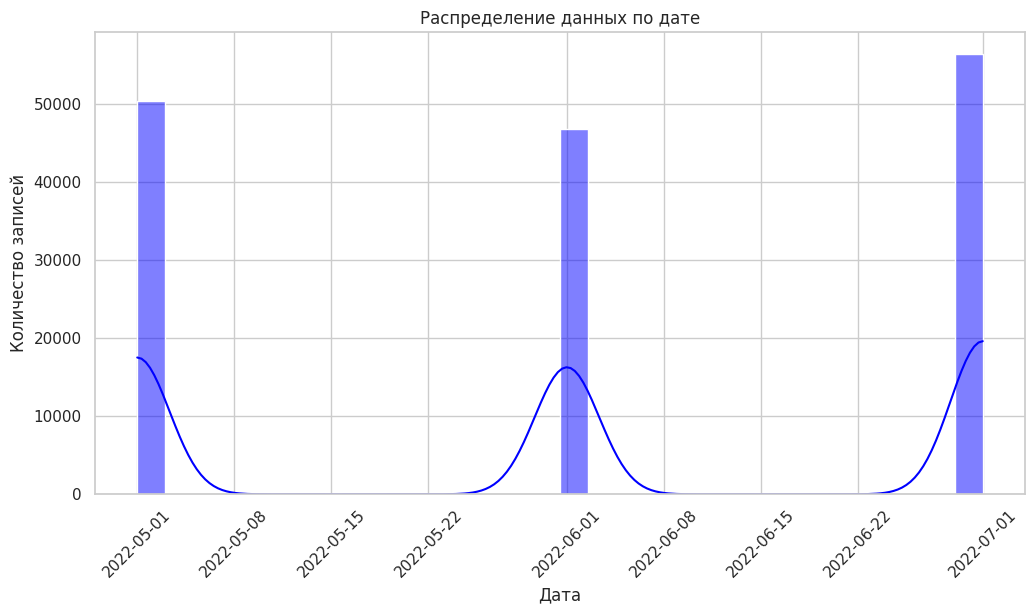

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем 'date' в datetime
df_with_inf['date'] = pd.to_datetime(df_with_inf['date'], format='%Y%m')

# Настройка стиля графиков
sns.set(style="whitegrid")

# Построение гистограммы распределения дат
plt.figure(figsize=(12, 6))
sns.histplot(df_with_inf['date'], bins=30, kde=True, color='blue')
plt.title('Распределение данных по дате')
plt.xlabel('Дата')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

In [ ]:
date_counts = df_with_inf['date'].value_counts().sort_index()  # Сортировка по дате
print(date_counts)

date
2022-05-01    50400
2022-06-01    46817
2022-07-01    56408
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Преобразуем дату в timestamp
df_with_inf['timestamp'] = df_with_inf['date'].astype(int) / 10**9  # Преобразуем в секунды

# Удаляем исходный столбец 'date', так как он больше не нужен
df_with_inf = df_with_inf.drop(columns=['date'])

# Кодирование категориальных признаков
categorical_columns = ['color', 'clarity', 'cut', 'fluor', 'platform', 'shape', 'polish']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_with_inf[col] = le.fit_transform(df_with_inf[col])
    label_encoders[col] = le  # Сохраняем кодировщики для будущего использования

# Проверка данных после преобразований
print("Данные после преобразований:")
print(df_with_inf.head())

Данные после преобразований:
   fluor symmetry  platform  shape  color  clarity  cut  polish  carat      z  \
0      2       EX         0      7      2        3    2       0   1.55  10.29   
1      2       EX         0      9      1        6    0       0   1.00   6.39   
2      0       EX         0      9      6        7    0       0   1.50   7.38   
3      2       EX         0      7      0        4    2       0   1.51  10.67   
4      2       VG         0      1      7        4    2       2   0.91   6.30   

      x  depth_perc        y  price_per_carat_corrected  price_corrected  \
0  6.41        62.0  3.97420                7445.028096     10374.556659   
1  6.44        61.4  3.95416                8660.000000      8660.000000   
2  7.41        60.0  4.44600                7870.000000     11805.000000   
3  6.23        59.0  3.67570                7445.028096     10374.556659   
4  4.58        71.0  3.25180                7445.028096     10374.556659   

   timestamp  
0   0.000202

In [ ]:
df_with_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58523 entries, 0 to 58522
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fluor                      58523 non-null  int64  
 1   symmetry                   58522 non-null  object 
 2   platform                   58523 non-null  int64  
 3   shape                      58523 non-null  int64  
 4   color                      58523 non-null  int64  
 5   clarity                    58523 non-null  int64  
 6   cut                        58523 non-null  int64  
 7   polish                     58523 non-null  int64  
 8   carat                      58523 non-null  float64
 9   z                          58522 non-null  float64
 10  x                          58522 non-null  float64
 11  depth_perc                 58522 non-null  float64
 12  y                          58522 non-null  float64
 13  price_per_carat_corrected  58523 non-null  flo

In [ ]:
df_with_inf['symmetry'] = le.fit_transform(df_with_inf['symmetry'])

In [ ]:
df_with_inf

,fluor,symmetry,platform,shape,color,clarity,cut,polish,carat,z,x,depth_perc,y,price_per_carat_corrected,price_corrected,timestamp
0,2,0,0,7,0,4,2,0,1.51,10.67,6.23,59.0,3.67570,7401.359878,9517.197052,1.651363e+09
1,2,3,0,1,7,4,2,2,0.91,6.30,4.58,71.0,3.25180,7401.359878,9517.197052,1.651363e+09
2,2,3,0,7,6,5,2,2,2.27,11.66,7.26,62.2,4.51572,7401.359878,9517.197052,1.656634e+09
3,1,0,0,9,6,4,0,0,1.01,6.37,6.42,62.0,3.98040,3738.359747,3775.739568,1.651363e+09
4,2,0,0,9,3,3,0,0,1.00,6.30,6.35,63.7,4.04495,7295.736183,7295.736183,1.654042e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153620,2,3,0,9,2,4,3,0,1.50,7.26,7.35,61.2,4.49820,6153.330000,9230.000000,1.656634e+09
153621,2,0,0,9,7,3,0,0,1.08,6.55,6.56,62.1,4.07376,3981.480000,4300.000000,1.656634e+09
153622,2,0,0,9,7,3,0,0,1.08,6.55,6.56,62.1,4.07376,3981.480000,4300.000000,1.656634e+09
153623,2,0,0,9,5,3,0,0,1.01,6.46,6.49,60.8,3.94592,5980.200000,6040.000000,1.656634e+09


In [ ]:
from sklearn.model_selection import train_test_split

# Выбор признаков и целевой переменной
X = df_with_inf.drop(columns=["price_corrected"])
y = df_with_inf["price_corrected"]

# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

# Оценка качества модели с помощью MSE
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error (MSE) на валидационной выборке: {mse}")

Mean Squared Error (MSE) на валидационной выборке: 44596662.6833331


Теперь попробуем OHE (One Hot Encoding) и TargetEncoder (сравним их).

Нормализуем данные.

Поработаем с отсутствующими значениями (обратим внимание, что для 'fluor' значение может быть пропущено или флюоресценция может отсутствовать).

Выведем насколько удалось улучшить результат.

In [ ]:
! pip install category_encoders

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from typing import Tuple, List

def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    index = df.index
    one = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Используем sparse_output вместо sparse
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names_out(input_features=columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis=1)
    df = df.set_index(index)
    return df, col_names

# Список категориальных признаков
categorical_columns = ['color', 'clarity', 'cut', 'fluor', 'platform', 'shape', 'polish', 'symmetry']

# Применяем OHE
df_ohe, ohe_columns = OHE(df_with_inf, categorical_columns)

In [ ]:
df_ohe

,carat,z,x,depth_perc,y,price_per_carat_corrected,price_corrected,timestamp,color_0,color_1,...,shape_7,shape_8,shape_9,polish_0,polish_1,polish_2,symmetry_0,symmetry_1,symmetry_2,symmetry_3
0,1.51,10.67,6.23,59.0,3.67570,7401.359878,9517.197052,1.651363e+09,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.91,6.30,4.58,71.0,3.25180,7401.359878,9517.197052,1.651363e+09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.27,11.66,7.26,62.2,4.51572,7401.359878,9517.197052,1.656634e+09,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.01,6.37,6.42,62.0,3.98040,3738.359747,3775.739568,1.651363e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.00,6.30,6.35,63.7,4.04495,7295.736183,7295.736183,1.654042e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153620,1.50,7.26,7.35,61.2,4.49820,6153.330000,9230.000000,1.656634e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
153621,1.08,6.55,6.56,62.1,4.07376,3981.480000,4300.000000,1.656634e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
153622,1.08,6.55,6.56,62.1,4.07376,3981.480000,4300.000000,1.656634e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
153623,1.01,6.46,6.49,60.8,3.94592,5980.200000,6040.000000,1.656634e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Список категориальных признаков
categorical_columns = ['color', 'clarity', 'cut', 'fluor', 'platform', 'shape', 'polish', 'symmetry']

# Применяем OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Оставляем числовые признаки без изменений
)

# Применяем преобразования к данным
X_processed = preprocessor.fit_transform(df_with_inf)

# Преобразуем результат в DataFrame
# Получаем имена новых столбцов после OneHotEncoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Создаем DataFrame
df_ohe = pd.DataFrame(X_processed, columns=list(ohe_feature_names) + list(df_with_inf.columns.difference(categorical_columns)))

# Проверка результата
print("Данные после OneHotEncoding:")
print(df_ohe.head())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  


Данные после OneHotEncoding:
   color_0  color_1  color_2  color_3  color_4  color_5  color_6  color_7  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   

   color_8  color_9  ...  symmetry_2  symmetry_3  carat  depth_perc  \
0      0.0      0.0  ...         0.0         0.0   1.51       10.67   
1      0.0      0.0  ...         0.0         1.0   0.91        6.30   
2      0.0      0.0  ...         0.0         1.0   2.27       11.66   
3      0.0      0.0  ...         0.0         0.0   1.01        6.37   
4      0.0      0.0  ...         0.0         0.0   1.00        6.30   

   price_corrected  price_per_carat_corrected  timestamp            x  \
0       

In [ ]:
from sklearn.preprocessing import StandardScaler

# Список числовых признаков
numerical_columns = ['carat', 'z', 'x', 'depth_perc', 'y', 'timestamp']

# Применяем StandardScaler к числовым признакам
scaler = StandardScaler()
df_ohe[numerical_columns] = scaler.fit_transform(df_ohe[numerical_columns])

# Проверка результата
print("Данные после нормализации:")
print(df_ohe[numerical_columns].head())

Данные после нормализации:
      carat         z             x  depth_perc             y  timestamp
0  0.417458 -1.253879 -1.359658e-12    3.142390  1.037849e-12  -0.817387
1 -0.623755 -1.253879 -1.359658e-12   -0.532634  1.037849e-12  -1.658906
2  1.736327  1.147948 -1.359658e-12    3.974947  1.037849e-12   0.850205
3 -0.450220 -1.253879 -9.119131e-01   -0.473767 -5.044452e-01  -0.212503
4 -0.467573 -0.033278 -2.629528e-02   -0.532634 -1.951778e-01  -0.084359


In [ ]:
df_ohe.head()

,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,color_8,color_9,...,symmetry_2,symmetry_3,carat,depth_perc,price_corrected,price_per_carat_corrected,timestamp,x,y,z
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.417458,3.142390,6.23,59.0,-0.817387,-1.359658e-12,1.037849e-12,-1.253879
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,-0.623755,-0.532634,4.58,71.0,-1.658906,-1.359658e-12,1.037849e-12,-1.253879
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.736327,3.974947,7.26,62.2,0.850205,-1.359658e-12,1.037849e-12,1.147948
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-0.450220,-0.473767,6.42,62.0,-0.212503,-9.119131e-01,-5.044452e-01,-1.253879
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.467573,-0.532634,6.35,63.7,-0.084359,-2.629528e-02,-1.951778e-01,-0.033278


In [ ]:
# Разделение данных на обучающую и валидационную выборки
X = df_ohe.drop(columns=["price_corrected"])  # Признаки
y = df_ohe["price_corrected"]  # Целевая переменная
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Обучение линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred = linear_model.predict(X_valid)

# Вычисление MSE
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error (MSE) на валидационной выборке: {mse}")

Mean Squared Error (MSE) на валидационной выборке: 0.002323780933194439


Сравним результаты нашей модели с результатами KNN

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Обучение KNN-регрессора
knn_model = KNeighborsRegressor(n_neighbors=5)  # Используем 5 соседей
knn_model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred_knn = knn_model.predict(X_valid)

# Вычисление MSE для KNN
mse_knn = mean_squared_error(y_valid, y_pred_knn)
print(f"Mean Squared Error (MSE) для KNN на валидационной выборке: {mse_knn}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False and the attribute exists, then check that it is equal to
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KNeighborsRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Mean Squared Error (MSE) для KNN на валидационной выборке: 0.0178820069650122


## Деревья решений

Попробуем выполнить то же задание, но с помощью модели Decision Trees.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Обучение Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=13)
tree_model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred_tree = tree_model.predict(X_valid)

# Вычисление MSE для Decision Tree
mse_tree = mean_squared_error(y_valid, y_pred_tree)
print(f"Mean Squared Error (MSE) для Decision Tree на валидационной выборке: {mse_tree}")

Mean Squared Error (MSE) для Decision Tree на валидационной выборке: 0.0008523807973962573


## Ансамблевые методы

Попробуем выполнить то же задание, но с использованием ансамблевых методов (модель случайного леса).

In [ ]:
# your code here

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Обучение Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=13)
rf_model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred_rf = rf_model.predict(X_valid)

# Вычисление MSE для Random Forest
mse_rf = mean_squared_error(y_valid, y_pred_rf)
print(f"Mean Squared Error (MSE) для Random Forest на валидационной выборке: {mse_rf}")

Mean Squared Error (MSE) для Random Forest на валидационной выборке: 0.0003061571674532133


## Заключение

Сравним все модели, выберем лучшую и сделаем вывод в целом.

Лучшая модель:

Random Forest показал наименьшую ошибку (MSE = 0.00031) и является лучшей моделью для данной задачи.

Возможности для улучшения:

Feature Engineering: Создание новых признаков (например, объем бриллианта = x * y * z) может улучшить качество модели.

Оптимизация гиперпараметров: Использование GridSearchCV или RandomizedSearchCV для подбора оптимальных гиперпараметров моделей.

Для дальнейшего улучшения результатов можно провести более глубокий анализ данных, включая feature engineering, оптимизацию гиперпараметров и использование более сложных моделей.